# CALIDAD DE DATOS

<h1>Archivo : 10_1_accesos_a_internet_fijo_por_velocidad_bajada_y_provincias.csv</h1> 

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

In [ ]:
# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [225]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\10_1_accesos_a_internet_fijo_por_velocidad_bajada_y_provincias.csv', sep=',', encoding='ANSI')

In [226]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,AÃ±o,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps","1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps","6,7 Mbps",3 Mbps,"3,2 Mbps","3,3 Mbps","3,5 Mbps",4 Mbps,"4,5 Mbps",5 Mbps,6 Mbps,"6,4 Mbps",7 Mbps,"7,5 Mbps",8 Mbps,9 Mbps,10 Mbps,"10,2 Mbps","10,6 Mbps",11 Mbps,12 Mbps,"12,3 Mbps",13 Mbps,14 Mbps,15 Mbps,16 Mbps,17 Mbps,18 Mbps,19 Mbps,20 Mbps,"20,5 Mbps",21 Mbps,22 Mbps,23 Mbps,24 Mbps,25 Mbps,"25,1 Mbps","25,11 Mbps","25,5 Mbps",26 Mbps,27 Mbps,28 Mbps,29 Mbps,30 Mbps,31 Mbps,32 Mbps,34 Mbps,35 Mbps,36 Mbps,37 Mbps,38 Mbps,39 Mbps,40 Mbps,41 Mbps,45 Mbps,46 Mbps,47 Mbps,48 Mbps,49 Mbps,50 Mbps,"50,1 Mbps",51 Mbps,"50,25 Mbps",52 Mbps,54 Mbps,55 Mbps,56 Mbps,58 Mbps,59 Mbps,60 Mbps,61 Mbps,62 Mbps,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,18.736,- 0,- 0,141,21.152,- 0,26,- 0,53.034,- 0,- 0,41.976,14.269,65,32.973,96.230,- 0,10.945,984,64.913,517,204.191,- 0,- 0,10,22.677,- 0,212,44,85.876,258,2,161,- 0,135.315,- 0,3,1,18,88,40.387,- 0,- 0,- 0,- 0,- 0,- 0,- 0,777.236,1.610,16,1,1.365,4,- 0,- 0,- 0,3.790,9,- 0,- 0,- 0,777,1,463.798,- 0,- 0,- 0,- 0,- 0,113,- 0,1,59,435.439,78,1,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0


In [227]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [228]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AÃ±o        504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    505 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [229]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [230]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

In [231]:
df = df.rename(columns={'aã±o':'año'})

In [232]:
l1sta_columnas = df.columns.to_list()

In [233]:
# Convertir las cadenas en números (reemplazar comas por puntos y convertir a float)
for columna in l1sta_columnas:
    if df[columna].dtype == 'object':
        df[columna] = df[columna].str.replace(',', '.')
        df[columna] = df[columna].str.replace('-', '')

In [234]:
# Convertir las cadenas en números de punto flotante
for columna in l1sta_columnas:
    if df[columna].dtype == 'object':
        df[columna] = pd.to_numeric(df[columna].str.replace(',', '.'), errors='coerce')

        

In [235]:
df.head(1)

,año,trimestre,provincia,otros,"0,256_mbps","0,375_mbps","0,625_mbps","0,5_mbps","0,512_mbps","0,75_mbps",1_mbps,"1,2_mbps","1,25_mbps","1,5_mbps",2_mbps,"2,2_mbps","2,5_mbps","6,7_mbps",3_mbps,"3,2_mbps","3,3_mbps","3,5_mbps",4_mbps,"4,5_mbps",5_mbps,6_mbps,"6,4_mbps",7_mbps,"7,5_mbps",8_mbps,9_mbps,10_mbps,"10,2_mbps","10,6_mbps",11_mbps,12_mbps,"12,3_mbps",13_mbps,14_mbps,15_mbps,16_mbps,17_mbps,18_mbps,19_mbps,20_mbps,"20,5_mbps",21_mbps,22_mbps,23_mbps,24_mbps,25_mbps,"25,1_mbps","25,11_mbps","25,5_mbps",26_mbps,27_mbps,28_mbps,29_mbps,30_mbps,31_mbps,32_mbps,34_mbps,35_mbps,36_mbps,37_mbps,38_mbps,39_mbps,40_mbps,41_mbps,45_mbps,46_mbps,47_mbps,48_mbps,49_mbps,50_mbps,"50,1_mbps",51_mbps,"50,25_mbps",52_mbps,54_mbps,55_mbps,56_mbps,58_mbps,59_mbps,60_mbps,61_mbps,62_mbps,63_mbps,64_mbps,65_mbps,66_mbps,67_mbps,68_mbps,70_mbps,71_mbps,75_mbps,77_mbps
0,2022.0,4.0,NaN,97.634,18.0,0.0,0.0,28.724,192.0,4.611,18.736,0.0,0.0,141.0,21.152,0.0,26.0,0.0,53.034,0.0,0.0,41.976,14.269,65.0,32.973,96.23,0.0,10.945,984.0,64.913,517.0,204.191,0.0,0.0,10.0,22.677,0.0,212.0,44.0,85.876,258.0,2.0,161.0,0.0,135.315,0.0,3.0,1.0,18.0,88.0,40.387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.236,1.61,16.0,1.0,1.365,4.0,0.0,0.0,0.0,3.79,9.0,0.0,0.0,0.0,777.0,1.0,463.798,0.0,0.0,0.0,0.0,0.0,113.0,0.0,1.0,59.0,435.439,78.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,5.655,0.0,90.796,0.0


Verificamos la existencia de registros duplicados

In [236]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,provincia,otros,"0,256_mbps","0,375_mbps","0,625_mbps","0,5_mbps","0,512_mbps","0,75_mbps",1_mbps,"1,2_mbps","1,25_mbps","1,5_mbps",2_mbps,"2,2_mbps","2,5_mbps","6,7_mbps",3_mbps,"3,2_mbps","3,3_mbps","3,5_mbps",4_mbps,"4,5_mbps",5_mbps,6_mbps,"6,4_mbps",7_mbps,"7,5_mbps",8_mbps,9_mbps,10_mbps,"10,2_mbps","10,6_mbps",11_mbps,12_mbps,"12,3_mbps",13_mbps,14_mbps,15_mbps,16_mbps,17_mbps,18_mbps,19_mbps,20_mbps,"20,5_mbps",21_mbps,22_mbps,23_mbps,24_mbps,25_mbps,"25,1_mbps","25,11_mbps","25,5_mbps",26_mbps,27_mbps,28_mbps,29_mbps,30_mbps,31_mbps,32_mbps,34_mbps,35_mbps,36_mbps,37_mbps,38_mbps,39_mbps,40_mbps,41_mbps,45_mbps,46_mbps,47_mbps,48_mbps,49_mbps,50_mbps,"50,1_mbps",51_mbps,"50,25_mbps",52_mbps,54_mbps,55_mbps,56_mbps,58_mbps,59_mbps,60_mbps,61_mbps,62_mbps,63_mbps,64_mbps,65_mbps,66_mbps,67_mbps,68_mbps,70_mbps,71_mbps,75_mbps,77_mbps


Verificamos la existencia de valores nulos

In [237]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año             1
trimestre       1
provincia     505
otros           1
0,256_mbps      1
             ... 
68_mbps         1
70_mbps         1
71_mbps         1
75_mbps         1
77_mbps         1
Length: 97, dtype: int64

In [239]:
registros_con_nulos = df[df.isnull().any(axis=1)]
registros_con_nulos

,año,trimestre,provincia,otros,"0,256_mbps","0,375_mbps","0,625_mbps","0,5_mbps","0,512_mbps","0,75_mbps",1_mbps,"1,2_mbps","1,25_mbps","1,5_mbps",2_mbps,"2,2_mbps","2,5_mbps","6,7_mbps",3_mbps,"3,2_mbps","3,3_mbps","3,5_mbps",4_mbps,"4,5_mbps",5_mbps,6_mbps,"6,4_mbps",7_mbps,"7,5_mbps",8_mbps,9_mbps,10_mbps,"10,2_mbps","10,6_mbps",11_mbps,12_mbps,"12,3_mbps",13_mbps,14_mbps,15_mbps,16_mbps,17_mbps,18_mbps,19_mbps,20_mbps,"20,5_mbps",21_mbps,22_mbps,23_mbps,24_mbps,25_mbps,"25,1_mbps","25,11_mbps","25,5_mbps",26_mbps,27_mbps,28_mbps,29_mbps,30_mbps,31_mbps,32_mbps,34_mbps,35_mbps,36_mbps,37_mbps,38_mbps,39_mbps,40_mbps,41_mbps,45_mbps,46_mbps,47_mbps,48_mbps,49_mbps,50_mbps,"50,1_mbps",51_mbps,"50,25_mbps",52_mbps,54_mbps,55_mbps,56_mbps,58_mbps,59_mbps,60_mbps,61_mbps,62_mbps,63_mbps,64_mbps,65_mbps,66_mbps,67_mbps,68_mbps,70_mbps,71_mbps,75_mbps,77_mbps
0,2022.0,4.0,NaN,97.634,18.0,0.0,0.0,28.724,192.0,4.611,18.736,0.0,0.0,141.0,21.152,0.0,26.0,0.0,53.034,0.0,0.0,41.976,14.269,65.0,32.973,96.230,0.0,10.945,984.0,64.913,517.0,204.191,0.0,0.0,10.0,22.677,0.0,212.0,44.0,85.876,258.0,2.0,161.000,0.0,135.315,0.0,3.0,1.0,18.0,88.000,40.387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.236,1.61,16.0,1.0,1.365,4.0,0.0,0.0,0.0,3.79,9.0,0.0,0.0,0.0,777.0,1.0,463.798,0.0,0.0,0.0,0.0,0.0,113.0,0.0,1.0,59.0,435.439,78.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,5.655,0.0,90.796,0.0
1,2022.0,4.0,NaN,106.772,31.0,0.0,0.0,451.000,34.0,1.307,3.789,0.0,0.0,0.0,286.000,0.0,0.0,0.0,3.564,0.0,0.0,11.975,991.000,0.0,3.427,11.077,0.0,7.000,0.0,16.652,3.0,47.991,0.0,0.0,5.0,12.000,0.0,0.0,0.0,29.692,5.0,0.0,0.000,0.0,6.622,0.0,1.0,0.0,0.0,0.000,2.370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.801,0.00,0.0,0.0,9.000,0.0,0.0,0.0,30.0,122.00,0.0,0.0,0.0,0.0,0.0,0.0,76.732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,105.156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.000,0.0,28.406,0.0
2,2022.0,4.0,NaN,2.280,0.0,0.0,0.0,34.000,37.0,0.000,315.000,0.0,0.0,0.0,115.000,0.0,0.0,0.0,979.000,0.0,0.0,0.000,0.000,0.0,71.000,1.551,0.0,1.000,0.0,0.000,0.0,5.027,0.0,0.0,0.0,407.000,0.0,0.0,0.0,742.000,0.0,0.0,0.000,0.0,3.489,0.0,0.0,0.0,0.0,2.228,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,893.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,30.388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
3,2022.0,4.0,NaN,3.909,0.0,225.0,111.0,234.000,2.0,0.000,660.000,0.0,25.0,0.0,780.000,0.0,0.0,0.0,3.909,0.0,0.0,167.000,385.000,0.0,3.588,7.213,0.0,106.000,0.0,702.000,1.0,17.037,0.0,0.0,0.0,137.000,0.0,0.0,0.0,2.808,0.0,0.0,0.000,0.0,3.759,0.0,0.0,0.0,0.0,0.000,747.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.303,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,18.00,0.0,0.0,0.0,0.0,0.0,0.0,27.538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
4,2022.0,4.0,NaN,20.026,8.0,0.0,0.0,69.000,32.0,836.000,778.000,0.0,0.0,0.0,5.910,0.0,0.0,0.0,5.397,0.0,0.0,11.441,5.571,0.0,2.407,15.731,0.0,155.000,0.0,12.646,151.0,18.055,0.0,0.0,1.0,14.445,0.0,0.0,32.0,18.677,0.0,0.0,0.000,0.0,1.573,0.0,0.0,0.0,0.0,2.967,4.134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.658,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,18.00,0.0,0.0,0.0,0.0,140.0,0.0,17.350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2017.0,4.0,NaN,14.119,0.0,0.0,0.0,3.109,0.0,7.637,26.495,0.0,0.0,0.0,3.994,0.0,0.0,0.0,10.009,0.0,0.0,93.221,8.068,0.0,3.785,190.921,0.0,45.000,0.0,28.663,0.0,80.231,0.0,0.0,0.0,81.931,0.0,1.0,0.0,5.213,0.0,0.0,8.289,0.0,55.895,0.0,24.0,0.0,0.0,0.000,27.074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.877,0.00,0.0,0.0,387.000,0.0,0.0,0.0,0.0,2.00,0.0,77.0,0.0,0.0,0.0,0.0,14.755,0.

In [240]:
df['provincia'].unique()

array([nan])

In [ ]:
# Eliminar la columna 'provincia'
df = df.drop('columna_a_eliminar', axis=1)

In [ ]:

lista_columnas = ['0,256_mbps', '0,375_mbps', '0,625_mbps', '0,5_mbps', '0,512_mbps', '0,75_mbps', '1_mbps', '1,2_mbps',
                   '1,25_mbps', '1,5_mbps', '2_mbps', '2,2_mbps', '2,5_mbps', '3_mbps', '3,2_mbps', '3,3_mbps', '3,5_mbps',
                     '4_mbps', '4,5_mbps', '5_mbps', '6_mbps', '6,4_mbps', '6,7_mbps','7_mbps', '7,5_mbps', '8_mbps', '9_mbps', '10_mbps']
lista_columnas1 = ['10,2_mbps','10,6_mbps', '11_mbps', '12_mbps', '12,3_mbps', '13_mbps', '14_mbps','15_mbps', '16_mbps', '17_mbps',
                    '18_mbps', '19_mbps', '20_mbps','20,5_mbps', '21_mbps', '22_mbps', '23_mbps', '24_mbps', '25_mbps','25,1_mbps',
                      '25,11_mbps', '25,5_mbps', '26_mbps', '27_mbps', '28_mbps','29_mbps', '30_mbps',]
lista_columnas2 = ['31_mbps', '32_mbps', '34_mbps', '35_mbps','36_mbps', '37_mbps', '38_mbps', '39_mbps', '40_mbps', '41_mbps',
                   '45_mbps', '46_mbps', '47_mbps', '48_mbps', '49_mbps', '50_mbps']
lista_columnas3 = ['50,1_mbps', '51_mbps', '50,25_mbps', '52_mbps', '54_mbps', '55_mbps','56_mbps', '58_mbps', '59_mbps', '60_mbps',
                    '61_mbps', '62_mbps','63_mbps', '64_mbps', '65_mbps', '66_mbps', '67_mbps', '68_mbps','70_mbps']
lista_columnas4 = ['71_mbps', '75_mbps', '77_mbps', 'hasta_10_mbps']

In [ ]:
# Crear la columna "hasta_10_mbps" que es la suma de las columnas especificadas
df['hasta_10_mbps'] = df[lista_columnas].sum(axis=1)

In [ ]:
# Crear la columna "de_10_a_30_mbps" que es la suma de las columnas especificadas
df['de_10_a_30_mbps'] = df[lista_columnas1].sum(axis=1)

In [ ]:
# Crear la columna "de_30_a_50_mbps" que es la suma de las columnas especificadas
df['de_30_a_50_mbps'] =  df[lista_columnas2].sum(axis=1)

In [ ]:
# Crear la columna "de_50_a_70_mbps" que es la suma de las columnas especificadas
df['de_50_a_70_mbps'] =  df[lista_columnas3].sum(axis=1)

In [ ]:
# Crear la columna "mas_de_70_mbps" que es la suma de las columnas especificadas
df['mas_de_70_mbps'] =  df[lista_columnas4].sum(axis=1)

In [ ]:
# Eliminar las columnas especificadas
df = df.drop(columns=lista_columnas)
df = df.drop(columns=lista_columnas1)
df = df.drop(columns=lista_columnas2)
df = df.drop(columns=lista_columnas3)
df = df.drop(columns=lista_columnas4)

eliminamos las columnas que no usamos

In [ ]:
df.describe()

,año,trimestre,provincia,otros,de_10_a_30_mbps,de_30_a_50_mbps,de_50_a_70_mbps,mas_de_70_mbps
count,504.000000,504.000000,0.0,504.000000,5.050000e+02,505.000000,505.000000,505.000000
mean,2019.857143,2.571429,NaN,843.168706,4.547138e+03,2872.903685,1112.321255,5963.746352
std,1.522341,1.138019,NaN,6881.310068,4.828809e+04,24484.689233,20180.892963,37418.339855
min,2017.000000,1.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,NaN,2.165250,2.573130e+02,12.502000,0.000000,660.500000
50%,2020.000000,3.000000,NaN,6.996500,6.275090e+02,59.624000,0.000000,1107.563000
75%,2021.000000,4.000000,NaN,21.878250,1.154000e+03,421.630000,3.000000,1794.728000
max,2022.000000,4.000000,NaN,106772.000000,1.062288e+06,471371.000000,441360.000000,684493.000000


<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***graficar_lin*** :          para hacer un grafico de lineas de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>
- ***reemplazar_outliers*** :   para realizar el reemplazo de/los valores aoutliers por la media de la columna


In [ ]:
def graficar_box(data, columna):
    

    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    plt.show()
    return

In [ ]:
def graficar_lin(data, columna):
    # Graficar la variable en un gráfico de barras en función del tiempo
    plt.figure(figsize=(10, 5))
    plt.plot(data['fecha'], data[columna], label= columna, marker='o', linestyle='-', color='blue')

    plt.title('Gráfico de Barras de Variable en Función del Tiempo')
    plt.xlabel('fecha')
    plt.ylabel('Velocidades de conexion')
    plt.grid(True)
    plt.legend()

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()
    return

In [ ]:
def identificar_outliers(data, columna):
    """
    Identifica valores atípicos (outliers) en una columna específica de un DataFrame.

    Parameters:
        - data: DataFrame que contiene los datos.
        - columna: Nombre de la columna a verificar para outliers.

    Returns:
        - outliers: DataFrame con los valores atípicos encontrados.
    """

    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definir un umbral (por ejemplo, 3 veces la desviación estándar)
    threshold = 3 * std_dev

    # Identificar valores que superen el umbral y almacenarlos en una lista
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))][columna].tolist()


    return outliers

In [ ]:
def reemplazar_outliers(data, columna, lista):
    # Calcular la media'
    media = df[columna].mean()
    # Buscar los valores y asignarles el valor promedio si se encuentran
    for valor in lista:
        fila_indice = data.index[data[columna] == valor].tolist()
        if fila_indice:
            data.loc[fila_indice, columna] = media
    return

Realizamos el analisis del datasets completo

In [ ]:
df.columns

Index(['año', 'trimestre', 'provincia', 'otros', 'de_10_a_30_mbps',
       'de_30_a_50_mbps', 'de_50_a_70_mbps', 'mas_de_70_mbps'],
      dtype='object')

<h2> ******************************************************************************************************************************</h2>

<h1>Realizamos un grafico comparativo de todas las variables en funcion del tiempo por provincia

In [ ]:
# Obtener los valores únicos de 'columna1' y almacenarlos en una lista
valor_columna = df['provincia'].unique().tolist()

In [ ]:
a_evaluar = ['de_10_a_30_mbps','de_30_a_50_mbps', 'de_50_a_70_mbps', 'mas_de_70_mbps']

In [ ]:
def graficar_columnas_en_funcion_del_tiempo(df, lista_valores, col_veloc):
    """
    Grafica varias columnas en un gráfico de líneas en función del tiempo.

    Parameters:
        - df: DataFrame que contiene los datos.
        - columnas: Lista de nombres de columnas a graficar.
        - fecha_column: Nombre de la columna que contiene las fechas.

    Returns:
        None
    """
    
    
    
    for valor in lista_valores:
        plt.figure(figsize=(20, 6))
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            color = 'C' + str(col_veloc.index(col))  # Asigna un color a cada columna
            plt.plot(df_x['año'], df_x[col], label=f'{col} ({valor})', marker='o', linestyle='-', color=color)
        plt.title('Gráfico de Líneas de Variables en Función del Tiempo')
        plt.xlabel('año')
        plt.ylabel(valor)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize='small')
        # Rotar las etiquetas del eje x para una mejor legibilidad
        plt.xticks(rotation=45)
        # Mostrar el gráfico
        plt.show()

    


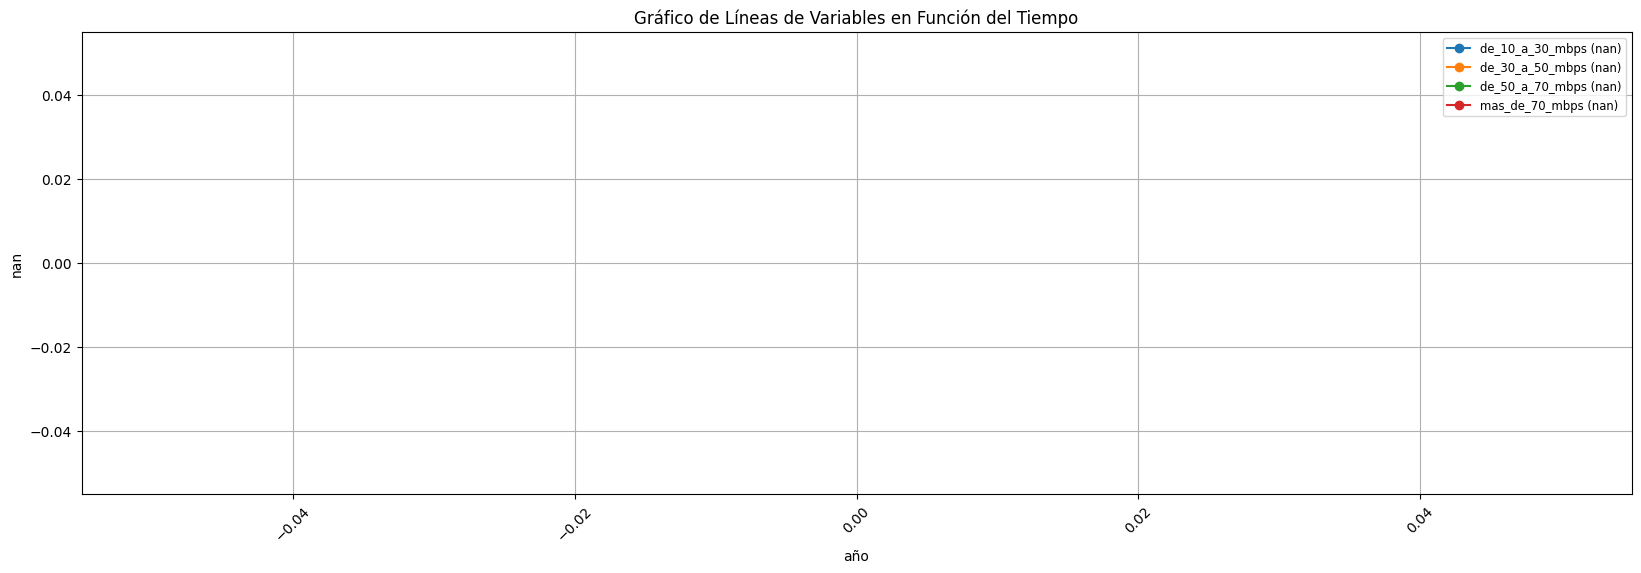

In [ ]:
graficar_columnas_en_funcion_del_tiempo(df, valor_columna, a_evaluar)

In [ ]:
df.to_csv('../csvPi/10_1_accesos_a_internet_fijo_por_velocidad_bajada_y_provincias.csv', index=False)